## 1. Data reading & splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# reading iteration6 data from LMS
# removed 4 columns
url = "https://drive.google.com/file/d/1g3t-rL1FFW158eGw9TC1KvKBZmlHgS6z/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)


# reading Ali's competition data
# removed 4 columns
url = "https://drive.google.com/file/d/1wGm7JnryxXFNBANRuBtkfWVT2atOa4PM/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data = pd.read_csv(path)

# X and y creation
X = data.copy()
y = data.pop("Expensive")

# Feature Engineering
#X.loc[:, "Cabin"] = X.Cabin.str[0]

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
len(test_data)

1459

In [ ]:
len(y)

1459

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   int64  
 1   LotFrontage    1200 non-null   float64
 2   TotalBsmtSF    1459 non-null   int64  
 3   BedroomAbvGr   1459 non-null   int64  
 4   Fireplaces     1459 non-null   int64  
 5   PoolArea       1459 non-null   int64  
 6   GarageCars     1459 non-null   int64  
 7   WoodDeckSF     1459 non-null   int64  
 8   ScreenPorch    1459 non-null   int64  
 9   MSZoning       1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Heating        1459 non-null   object 
 12  Street         1459 non-null   object 
 13  CentralAir     1459 non-null   object 
 14  Foundation     1459 non-null   object 
 15  ExterQual      1459 non-null   object 
 16  ExterCond      1459 non-null   object 
 17  BsmtQual       1422 non-null   object 
 18  BsmtCond

In [ ]:
data.isna().sum()

LotArea            0
LotFrontage      259
TotalBsmtSF        0
BedroomAbvGr       0
Fireplaces         0
                ... 
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
Length: 76, dtype: int64

## 2. Categorical encoding - "MANUAL" approach  (Without using Pipelines)

### 2.1. Replacing NaNs

We will need two different strategies to deal with missing values in numerical and categorical features.

#### 2.1.1. Replacing NaNs in categorical features

We were imputing the mean to NaN’s on our preprocessing pipeline for numerical features. There's a problem with categorical values: they don’t have a “mean”. Here, we will replace NaNs with a string that marks them: “N_A”. It is not an elegant solution, but it will allow us to move forward.

In [ ]:
# selecting non-numerical columns
X_train_cat = X.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A")

# fitting the imputer
cat_imputer.fit(X_train_cat)

# transforming the data & keeping it as a DataFrame
X_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train_cat), 
                             columns=X_train_cat.columns)
X_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Condition1     1459 non-null   object
 2   Heating        1459 non-null   object
 3   Street         1459 non-null   object
 4   CentralAir     1459 non-null   object
 5   Foundation     1459 non-null   object
 6   ExterQual      1459 non-null   object
 7   ExterCond      1459 non-null   object
 8   BsmtQual       1459 non-null   object
 9   BsmtCond       1459 non-null   object
 10  BsmtExposure   1459 non-null   object
 11  BsmtFinType1   1459 non-null   object
 12  KitchenQual    1459 non-null   object
 13  FireplaceQu    1459 non-null   object
 14  LotShape       1459 non-null   object
 15  LandContour    1459 non-null   object
 16  Utilities      1459 non-null   object
 17  LotConfig      1459 non-null   object
 18  LandSlope      1459 non-null

In [ ]:
# To check categorical values
for i in X_train_cat:
    print(i, " : ", data[i].unique())

MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Heating  :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
Street  :  ['Pave' 'Grvl']
CentralAir  :  ['Y' 'N']
Foundation  :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
ExterQual  :  ['Gd' 'TA' 'Ex' 'Fa']
ExterCond  :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual  :  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond  :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1  :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
KitchenQual  :  ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu  :  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTR

#### 2.1.2. Replacing NaNs in numerical features

This is what we already did in previous notebooks: replacing numerical NaNs with the mean of their column.

In [ ]:
# Selecting numerical columns
X_train_num = X.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")

# Fitting
num_imputer.fit(X_train_num)

# Transforming, keeping a DataFrame
X_num_imputed = pd.DataFrame(num_imputer.transform(X_train_num), 
                             columns=X_train_num.columns)

X_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   float64
 1   LotFrontage    1459 non-null   float64
 2   TotalBsmtSF    1459 non-null   float64
 3   BedroomAbvGr   1459 non-null   float64
 4   Fireplaces     1459 non-null   float64
 5   PoolArea       1459 non-null   float64
 6   GarageCars     1459 non-null   float64
 7   WoodDeckSF     1459 non-null   float64
 8   ScreenPorch    1459 non-null   float64
 9   Expensive      1459 non-null   float64
 10  MSSubClass     1459 non-null   float64
 11  OverallQual    1459 non-null   float64
 12  OverallCond    1459 non-null   float64
 13  YearBuilt      1459 non-null   float64
 14  YearRemodAdd   1459 non-null   float64
 15  MasVnrArea     1459 non-null   float64
 16  BsmtFinSF1     1459 non-null   float64
 17  BsmtFinSF2     1459 non-null   float64
 18  BsmtUnfS

In [ ]:
# Concatenating all columns
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)

X_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,8.0,2003.0,548.0,61.0,0.0,0.0,0.0,2.0,2008.0,1.0
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,6.0,1976.0,460.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0
2,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,6.0,2001.0,608.0,42.0,0.0,0.0,0.0,9.0,2008.0,3.0
3,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,...,7.0,1998.0,642.0,35.0,272.0,0.0,0.0,2.0,2006.0,4.0
4,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,9.0,2000.0,836.0,84.0,0.0,0.0,0.0,12.0,2008.0,5.0


In [ ]:
X_cat_imputed.describe()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,9,6,2,2,6,4,5,5,5,...,5,6,7,7,4,6,6,3,9,6
top,RL,Norm,GasA,Pave,Y,PConc,TA,TA,TA,TA,...,Ex,SBrkr,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1150,1259,1427,1453,1364,647,906,1281,648,1310,...,741,1333,1359,869,605,1310,1325,1339,1266,1197


In [ ]:
X_num_imputed.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,10517.225497,70.045833,1057.293352,2.866347,0.613434,2.760795,1.767649,93.804661,15.071282,0.148732,...,6.518163,1978.515965,473.115147,46.645648,21.969157,3.411926,43.518849,6.322138,2007.815627,730.000000
std,9984.675721,22.031192,438.824912,0.816050,0.644687,40.191018,0.747301,124.249421,55.775138,0.355946,...,1.625894,24.000202,213.815884,66.276387,61.137400,29.327247,496.291826,2.704540,1.328542,421.321334
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000
25%,7549.000000,60.000000,795.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,5.000000,1962.000000,336.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,365.500000
50%,9477.000000,70.045833,991.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,6.000000,1978.515965,480.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,730.000000
75%,11603.000000,79.000000,1298.500000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000,...,7.000000,2001.000000,576.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1094.500000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000,...,14.000000,2010.000000,1418.000000,547.000000,552.000000,508.000000,15500.000000,12.000000,2010.000000,1459.000000


### 2.2. One Hot encoding

As you have learnt in the Platform lesson, One Hot encoding means creating a new binary column for each category in every categorical column. Fortunately, a Scikit-Learn transformer takes care of everything.

#### 2.3.1. Fitting the `OneHotEncoder`

As with any transformer, we have to:
1. Import it
2. Initialize it
3. Fit it to the data
4. Use it to transform the data

In [ ]:
# import
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder()

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

The result is a "sparse matrix": an object that Scikit-Learn creates when a matrix contains mostly zeros:

In [ ]:
X_cat_imputed_onehot

<1459x251 sparse matrix of type '<class 'numpy.float64'>'
	with 56901 stored elements in Compressed Sparse Row format>

#### 2.3.2. Converting the sparse matrix into a DataFrame

To see what exactly is inside of this sparse matrix we can convert it to a pandas DataFrame: 

In [ ]:
df = pd.DataFrame.sparse.from_spmatrix(X_cat_imputed_onehot)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


We can see that all the columns contain either 0's or 1's. This is exactly how "one-hot" encoded columns (also called "dummy columns") look like: binary categories.

Now, for exploration and learning purposes, we will rename the columns in this dataframe so that we know the origin of each binary column (the category and original column they come from).

#### 2.3.3. Retrieving the column names for the "one-hot" columns

The fitted transformer contains this information, and the method `get_feature_names_out` allows us to recover the names of the columns.



> **Note:** If you're running this code as a local Jupyter notebook and you don't have the last version of Scikit-Learn, you might have to adapt the code. Check the documentation for the Scikit-Learn version you have installed.



In [ ]:
colnames = my_onehot.get_feature_names_out(X_cat_imputed.columns)
df.columns = colnames
df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Each column has the name of the original column, an underscore and the name of the category: 

- A column such as "Sex", with only two categories, "male" and "female", has become a single column, "Sex_male", where `1` stands for "male" and `0` for "female".

- A column such as "Cabin", with many categories ("A", "B", "C", "D", "E", "F", "G", "N_A", "T") has become as many columns as categories were (minus one), making the dataframe very wide and sparse.

### 2.3.4. Concatenating "one-hot" columns with numerical columns:

Now that the categorical columns are numerical, we can join them back with the originally numerical columns and assemble the dataset that will be ready for modelling:

In [ ]:
X_imputed = pd.concat([df, X_num_imputed], axis=1)

X_imputed.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,2003.0,548.0,61.0,0.0,0.0,0.0,2.0,2008.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.0,1976.0,460.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,2001.0,608.0,42.0,0.0,0.0,0.0,9.0,2008.0,3.0


In [ ]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 289 entries, MSZoning_C (all) to Id
dtypes: Sparse[float64, 0](251), float64(38)
memory usage: 1.1 MB


## 3. Categorical encoding - "Automated" approach (Using Pipelines)

In the manual approach, to encode the categorical columns numericall, we have:

1. Selected the categorical columns.
2. Fitted a `OneHotEncoder` to them.
3. Transformed the categorical columns with the encoder.
4. Converted the sparse matrix into a dataframe.
5. Recovered the names of the columns.
6. Concatenated the one-hot columns with the numerical columns.

All these steps can be synthetised by using Scikit-Learn Pipelines and specifically something called `ColumnTransformer`, which allows us to apply different transformations to two or more groups of columns: in our case, categorical and numerical columns.

This process is also called creating "branches" in the pipeline. One branch for the categorical columns and another for the numerical columns. Each branch will contain as many transformers as we want. Then, the branches will meet again, and the transformed columns will be automatically concatenated. Let's see the process in action:

### 3.1. Creating the "numeric pipe" and the "categoric pipe"

In [ ]:
# select categorical and numerical column names
X_cat_columns = X_train.select_dtypes(exclude="number").copy().columns
X_num_columns = X_train.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder()
)

In [ ]:
# select categorical and numerical column names
test_cat_columns = test_data.select_dtypes(exclude="number").copy().columns
test_num_columns = test_data.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder()
)

### 3.2. Using `ColumnTransformer` a pipeline with 2 branches (the `preprocessor`) 

We simply tell the pipeline the following:

- One branch, called `"num_pipe"`, will apply the steps in the `numeric_pipe` to the columns named in `X_num_columns`
- The second branch, called `"cat_pipe"`, will apply the steps in the `categoric_pipe` to the columns named in `X_cat_columns`

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

In [ ]:
test_preprocessor = ColumnTransformer(
    transformers=[
        ("test_num_pipe", numeric_pipe, test_num_columns),
        ("test_cat_pipe", categoric_pipe, test_cat_columns),
    ]
)

### 3.3. Creating the `full_pipeline` (`preprocessor` + Decision Tree)

Pipelines are modular. The `preprocessor` we created above with the `ColumnTransformer` can become now a step in a new pipeline, that we'll call `full_piepline` and will include, as a last step, a Decision Tree model:

In [ ]:
full_pipeline_dt = make_pipeline(preprocessor, 
                              DecisionTreeClassifier(random_state =10,max_depth=2,min_samples_leaf=2)) #))

In [ ]:
test_full_pipeline_dt = make_pipeline(test_preprocessor, 
                              DecisionTreeClassifier(random_state =10,max_depth=2,min_samples_leaf=2)) #))

We can then fit this `full_pipeline` to the data:

Note: notice that we did not fit the `preprocessor` before —we only fit the pipeline once it has been full assembled.

In [ ]:
full_pipeline_dt.fit(X_train, y_train)

In [ ]:
test_full_pipeline_dt.fit(X_train, y_train)

This full pipeline can make predictions, as any othet pipeline that ends with a model:

In [ ]:
acc_decision_tree = round(accuracy_score(y_train, full_pipeline_dt.predict(X_train))*100,2)

In [ ]:
test_acc_decision_tree = round(accuracy_score(y_train, full_pipeline_dt.predict(X_train))*100,2)

In [ ]:
test_acc_decision_tree

93.49

In [ ]:
acc_decision_tree

100.0

In [ ]:
import csv
import requests
test_result_dt = test_full_pipeline_dt.predict(X_train)
len(test_result_dt)

1167

In [ ]:
from google.colab import files
#df = pd.DataFrame(result_dt)
df = pd.DataFrame().assign(Id=test_data['Id'], Expensive=test_result_dt[0])
df.to_csv('test_result_dt.csv', index = False)
files.download("test_result_dt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#RandomForest
full_pipeline_rf = make_pipeline(test_preprocessor,
                              RandomForestClassifier(min_samples_leaf=2,n_estimators=100,random_state=10))
full_pipeline_rf.fit(X_train, y_train)
full_pipeline_rf.predict(X_train)
acc_random_forest = round(accuracy_score(y_train, full_pipeline_rf.predict(X_train))*100,2)
acc_random_forest

99.49

In [ ]:
import csv
import requests
result_rf = full_pipeline_rf.predict(X_train)
result_rf

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
from google.colab import files
#df = pd.DataFrame(result_rf)
df = pd.DataFrame().assign(Id=test_data['Id'], Expensive=result_rf[0])
df.to_csv('result_rf.csv', index = False)
files.download("result_rf.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# KNN 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
full_pipeline_knn = make_pipeline(test_preprocessor, 
                              KNeighborsClassifier(n_neighbors=3, weights ="uniform",leaf_size=2, metric="euclidean"))
full_pipeline_knn.fit(X_train, y_train)
full_pipeline_knn.predict(X_train)
acc_knn = round(accuracy_score(y_train, full_pipeline_knn.predict(X_train))*100,2)
acc_knn

94.86

In [ ]:
import csv
import requests
result_knn = full_pipeline_knn.predict(X_train)
len(result_knn)

1167

In [ ]:
from google.colab import files
df = pd.DataFrame().assign(Id=test_data['Id'], Expensive=result_knn[0])
#df = pd.DataFrame(result_knn)
df.to_csv('result_knn.csv', index = False)
files.download("result_knn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['KNN','Random Forest','Decision Tree'],
    'Score': [acc_knn, acc_random_forest, test_acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
99.49,Random Forest
94.86,KNN
93.49,Decision Tree


### **Exercise 1:** use the new Pipeline with branches to train a DecisionTree with GridSearch cross validation.

We are basically asking to combine what you have learned in this notebook (categorical encoding & branches) with what you learned in the previous one (using `GridSearchCV` for a whole Pipeline).

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range = [2, 4, 6, 8, 10]
estimators_range = [50,100,150]
num_range = ["mean", "median","std"]

dt_param_grid = [{
    "columntransformer__num_pipe__simpleimputer__strategy": num_range,
    "decisiontreeclassifier__max_depth": param_range,
    "decisiontreeclassifier__min_samples_leaf": param_range
}]
rf_param_grid = [{ "columntransformer__num_pipe__simpleimputer__strategy": num_range,
                   "randomforestclassifier__n_estimators" :estimators_range,
                   "randomforestclassifier__max_depth": param_range,
                   "randomforestclassifier__min_samples_leaf": param_range
}]
knn_param_grid = [{'kneighborsclassifier__n_neighbors': param_range,
                   'kneighborsclassifier__weights': ['uniform', 'distance'],
                   'kneighborsclassifier__metric': ['euclidean', 'manhattan']
                   #'kneighborsclassifier__standardscaler':[StandardScaler(), MinMaxScaler(), RobustScaler()]
}]

dt_search = GridSearchCV(estimator=full_pipeline_dt,
                      param_grid=dt_param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1)
rf_search = GridSearchCV(estimator=full_pipeline_rf,
                      param_grid=rf_param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1)
knn_search = GridSearchCV(estimator=full_pipeline_knn,
                      param_grid=knn_param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1)
grids = [dt_search,rf_search,knn_search]
for pipe in grids:
    pipe.fit(X_test,y_test)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py", line 509, in transform
    X_int, X_mask = self._transform(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py", line 142, in _transform
    raise ValueError(msg)
ValueError: Found unknown categories ['IR3'] in column 14 during transform

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


Streaming output truncated to the last 5000 lines.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 469, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.8/di

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File 

In [ ]:
grid_dict = {0: 'Decision Trees', 
             1: 'Random Forest',
             2: 'KNN'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

Decision Trees Test Accuracy: 1.0
Decision Trees Best Params: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__min_samples_leaf': 2}
Random Forest Test Accuracy: 0.9417808219178082
Random Forest Best Params: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 50}
KNN Test Accuracy: 0.9315068493150684
KNN Best Params: {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__weights': 'uniform'}


In [ ]:
from sklearn.metrics import confusion_matrix

rf_pred = rf_search.predict(X_test)
confusion_matrix(rf_pred, y_test)

array([[245,  17],
       [  0,  30]])

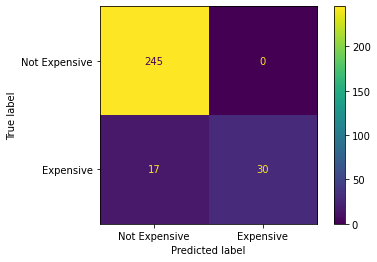

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [ ]:
dt_pred = dt_search.predict(X_test)
confusion_matrix(dt_pred, y_test)

array([[245,   0],
       [  0,  47]])

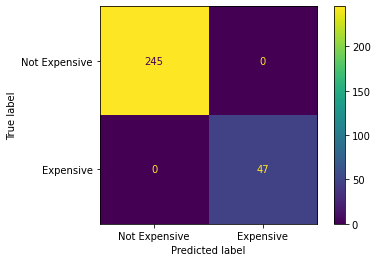

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [ ]:
knn_pred = knn_search.predict(X_test)
confusion_matrix(knn_pred, y_test)

array([[245,  20],
       [  0,  27]])

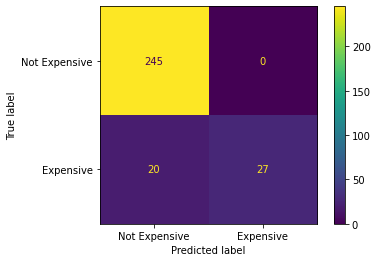

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, knn_pred)

0.7297297297297298